In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,14)

# Regression Trees

Trees can also perform regressions in addition to decisions. Using the regression tree models is pretty straightforward and very similar to any other model like linear regression. The regression tree itself is mostly similar to the decision tree, the primary difference is that both the outcomes and the error metrics are adapted to numerical values. 

<b>A Regression Tree:</b>

![Regression Tree](images/regression_tree.webp "Regression Tree" )

We can start by creating and looking at a regresion tree, as always, the mechanics of making and training the model is the same as we are used to. 

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(sklearn.datasets.load_boston())

df.head()

c:\Users\navne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


19
0.7946471074447365
(506, 13) (506, 1)


[Text(0.6761965110832772, 0.975, 'X[5] <= 6.945\nsquared_error = 83.1\nsamples = 379\nvalue = 22.604'),
 Text(0.4130194957266756, 0.925, 'X[12] <= 14.4\nsquared_error = 36.416\nsamples = 320\nvalue = 19.895'),
 Text(0.1721361622179185, 0.875, 'X[7] <= 1.422\nsquared_error = 22.563\nsamples = 192\nvalue = 23.065'),
 Text(0.09116863843044797, 0.825, 'X[11] <= 349.12\nsquared_error = 108.536\nsamples = 3\nvalue = 42.633'),
 Text(0.08847412849444257, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.09386314836645335, 0.775, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.253103686005389, 0.825, 'X[5] <= 6.543\nsquared_error = 15.023\nsamples = 189\nvalue = 22.754'),
 Text(0.09925216823846413, 0.775, 'X[12] <= 7.57\nsquared_error = 8.659\nsamples = 148\nvalue = 21.553'),
 Text(0.03469181542606938, 0.725, 'X[9] <= 222.5\nsquared_error = 3.491\nsamples = 34\nvalue = 24.003'),
 Text(0.03199730549006399, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text

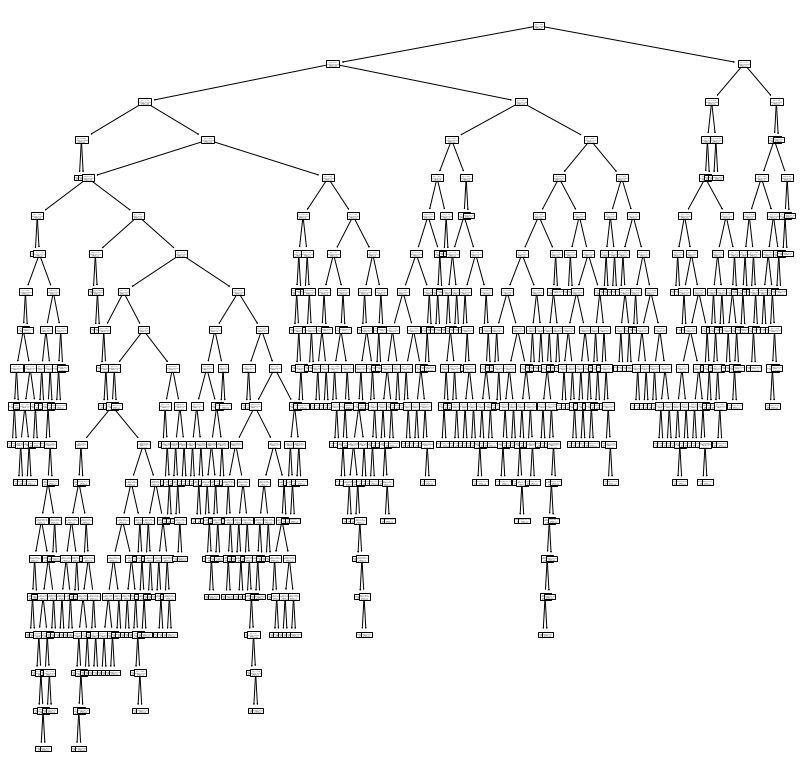

In [3]:
#Generate Model
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print(clf.get_depth())
print(clf.score(X_test, y_test))
print(X.shape, y.shape)
plot_tree(clf)

In [4]:
# Generate a better image
from sklearn.tree import export_graphviz
export_graphviz(clf,
                     out_file="output/reg_tree_1.dot",
                     feature_names = df.drop(columns={"target"}).columns, 
                     class_names=["0","1"],
                     filled = True)

## Regression Tree Decision Making

The regression tree works very similarly to the decision tree. The key differences are:
<ul>
<li> <b>Predictions:</b> Instead of producing a classification at the end, it produces an average of all the values in that group. That average is the prediction for anything that falls into that leaf on the tree. 
<li> <b>Split Decisions: </b>Instead of using the information gain concept that decision trees do, a regression tree tries to minimize error when splitting, normally MSE. So the algorithm seeks splits that have the lowest average error between the error and the values.
    <ul>
    <li> As a note, this should be familiar from the idea of a cost function. We want the model to minimize the error, how we define error can change, but the process of finding the optimal choice is the same. 
    <li> Rather than measures of set purity, like gini or entropy, the model uses the error as the metric to measure which split generates the "best" fitting tree. 
    </ul>
</ul>

Just like decision trees, there are a few options that we can set as HP - one of those being the error metric. We can choose absolute error or a couple of others for the error metric; we can also set limits to growth like depth and min_split_size. 

The more we allow the tree to expand, the more potential predictions we can make, but the more likely we are to overfit. Limiting the tree size means each terminal leaf will represent more records with its prediction, and the tree will be less likely to overfit.

#### Regression Tree Limitations

One specific weakness with regression trees is that they don't "extend" like a linear regression, they're bounded by whatever data they have. So if the maximum prediction that is generated in training is 50, no matter what future inputs look like it will never be able to predict beyond that. We can see this if we chart an example, there isn't a nice smooth prediction curve like a linear regression, we get blocky steps.

![Regression Tree](images/regtree2.png "Regression Tree" )

### Use a Grid Search to Improve

We can also utilize a grid search to do some HP tuning. Along with some other options we can try different error metrics. We can set a list for any of the hyperparameters that we want to use in the grid search, and every combination will be executed and evaluated. 

Note that the names for absolute and squared error are changing, so depending on the specific version of sklearn you have installed you might need to use absolute_error/squared_error or mae/mse, the meaning is the same, they just changed the label to be more descriptive. 

In [5]:
tree_para = {'min_samples_split':[2,3,4,5,6,7,8,9,10],
            'max_depth':[7,8,9,10,11,12,13,14,15,16], 
            'criterion':["friedman_mse", "poisson", "squared_error", "absolute_error"]}

clfCV = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=tree_para, cv=10) #See below for the CV argument
clfCV.fit(X_train, y_train)
clfCV.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_split=5, random_state=0)

Use the optimal combo from above and create a new model. We could have also grabbed the best model directly from above and saved it in a variable. 

0.7961908483372433


[Text(0.65, 0.9444444444444444, 'X[5] <= 6.945\nsquared_error = 83.1\nsamples = 379\nvalue = 22.604'),
 Text(0.37857142857142856, 0.8333333333333334, 'X[12] <= 14.4\nsquared_error = 36.416\nsamples = 320\nvalue = 19.895'),
 Text(0.16428571428571428, 0.7222222222222222, 'X[7] <= 1.422\nsquared_error = 22.563\nsamples = 192\nvalue = 23.065'),
 Text(0.15, 0.6111111111111112, 'squared_error = 108.536\nsamples = 3\nvalue = 42.633'),
 Text(0.17857142857142858, 0.6111111111111112, 'X[5] <= 6.543\nsquared_error = 15.023\nsamples = 189\nvalue = 22.754'),
 Text(0.1, 0.5, 'X[12] <= 7.57\nsquared_error = 8.659\nsamples = 148\nvalue = 21.553'),
 Text(0.04285714285714286, 0.3888888888888889, 'X[9] <= 222.5\nsquared_error = 3.491\nsamples = 34\nvalue = 24.003'),
 Text(0.02857142857142857, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.05714285714285714, 0.2777777777777778, 'X[7] <= 4.485\nsquared_error = 2.908\nsamples = 33\nvalue = 23.861'),
 Text(0.02857142857142857,

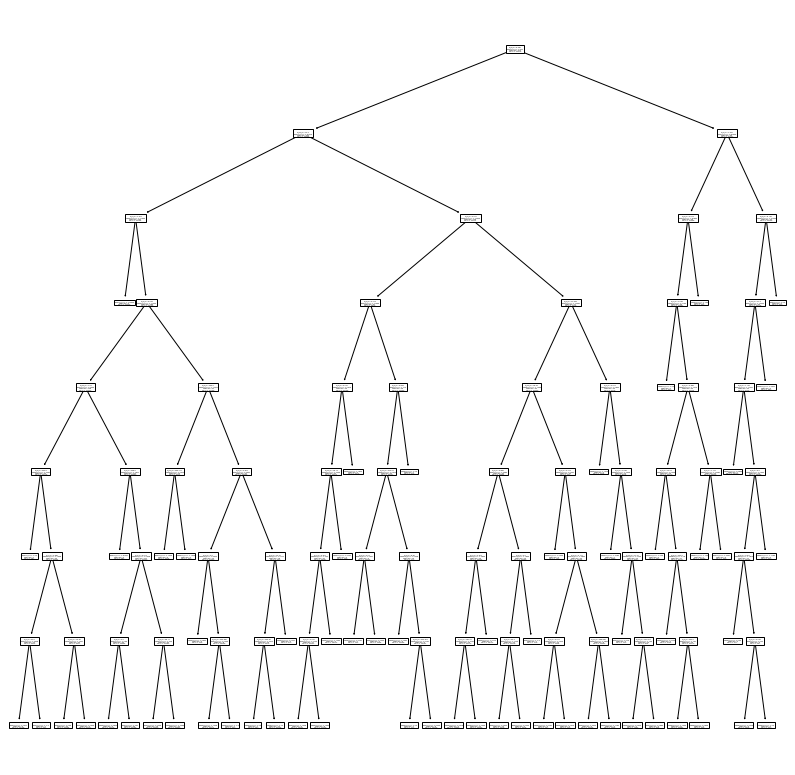

In [6]:
clf2 = DecisionTreeRegressor(max_depth=8, min_samples_split=8, random_state=0)
clf2 = clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
plot_tree(clf2)

In [7]:
# Generate a better image
export_graphviz(clf2,
                     out_file="output/reg_tree_2.dot",
                     feature_names = df.drop(columns={"target"}).columns, 
                     class_names=["0","1"],
                     filled = True)

### Regression Predictions

We can look at the predictions made by the tree (limit the tree size to make the chart above and the results obvious). Predictions are only at the results of one of the terminal leafs, we don't get a curve like a linear regression. 

This is a reason that regression trees aren't normally all that common, the number of distinct values that can be predicted is limited by the number of leafs in the tree. If we count the number of distinct predictions made and compare it to the number of total predictions made, we can see how we have a very small number of distinct values being predicted. 

Number of predictions made: 127
Unique predictions: 36


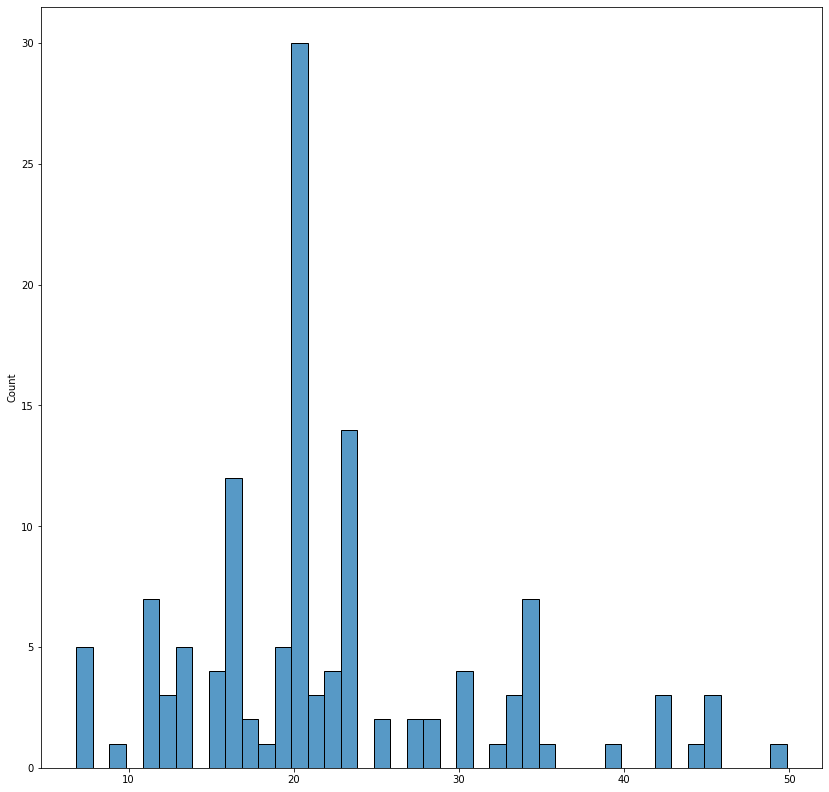

In [8]:
preds = clf2.predict(X_test)
sns.histplot(preds, binwidth=1)

print("Number of predictions made:", len(X_test))
print("Unique predictions:", len(np.unique(preds)))


## Exercise - Predict the Target (BodyFat)

In [9]:
#Load data
df_ = pd.read_csv("data/bodyfat.csv")

#Change BodyFat to be named target, to make code reuse easier
df_.rename(columns={"BodyFat":"target"}, inplace=True)

df_.head()

,Density,target,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

y_ = np.array(df_["target"]).reshape(-1,1)
X_ = np.array(df_.drop(columns={"target"}))
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

scaler_ = MinMaxScaler()
estimator_ = RandomForestRegressor(n_jobs=-1)
pipe_ = Pipeline(steps=[("scaler", scaler_), ("forest", estimator_)])

params_ = {'forest__max_depth':[5,6,7,8,9], 
            "forest__n_estimators":[75,100,125],
            "forest__max_features":[7,8,9,10,11,12,13,14]}
 
clf_ = GridSearchCV(pipe_, param_grid=params_, cv=5, n_jobs=-1) 
clf_.fit(X_train_, y_train_.ravel())
best_ = clf_.best_estimator_
print(best_.score(X_test_, y_test_))
print(best_)

0.9146006943886552
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest',
                 RandomForestRegressor(max_depth=8, max_features=14,
                                       n_jobs=-1))])


## Trees Please

Trees are one of the common machine learning algorithms, and have several advantages:
<ul>
<li> They show how decisions are made. A human can follow a decision tree and see exactly what happens on the way to a prediction. 
<li> They (can be) quite fast. 
<li> They are more felxible than other algorithms in dealing with categorical data, as a tree can natively handle a categorical value. <b>Note:</b> this is true for a tree in theory, in practice, specific implementations may still require numerical inputs. 
<li> They work well in ensables, in particular many of the best non-neural network algorithms are based on boosing ensables of trees. We'll look at these later. 
<li> They are resistant to outliers.
<li> Trees illustrate some of the internal processes of machine learning, as we can follow the actions of the algorithm and see how it makes decisions.
</ul>

There are also some downsides:
<ul>
<li> Regression trees are limited, and they can't extrapolate. 
<li> Forest ensables generally get better results, but don't maintain the same level of understandibility. 
<li> Overfitting is a concern, and we need to be careful to limit the growth of the tree.
</ul>

In practice, trees form the foundation model for several of the best and most recently developed non-neural network algorithms, like xgboost. We'll look at this later when we examine boosted ensemble models.